# Ejercicio 1
Para el estudio mediante simulación es necesario generar muchos números aleatorios en la computadora. Estos corresponden a variables aleatorias uniformemente distribuidas en el intervalo (0, 1). Existen en la literatura varias rutinas portables, optimizadas para generar enormes cantidades de números pseudo-aleatorios con velocidad razonable

In [62]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
import math
from random import random, expovariate 

- a)
Determinar el periodo de la secuencia de von Neumann generada a partir de la semilla:   
I)3009   
II)7600   
III)1234   
IV)4321

In [4]:
'''Funcion Von Neumann del teorico '''
def vonNeumann(u):
    u = (u**2 // 100) % 10000
    return u

def sim(Nsim, semilla):
    res = []
    res.append(semilla)
    y = semilla
    for i in range(Nsim):
        y_i = vonNeumann(y)
        if y_i in res:
            break
        res.append(y_i)
        y = y_i
    print(f"El perido K={i+1}")
    return res

print(sim(Nsim=100, semilla=3009))
print(sim(Nsim=100, semilla=7600))
print(sim(Nsim=100, semilla=1234))
print(sim(Nsim=100, semilla=4321))

El perido K=4
[3009, 540, 2916, 5030]
El perido K=1
[7600]
El perido K=57
[1234, 5227, 3215, 3362, 3030, 1809, 2724, 4201, 6484, 422, 1780, 1684, 8358, 8561, 2907, 4506, 3040, 2416, 8370, 569, 3237, 4781, 8579, 5992, 9040, 7216, 706, 4984, 8402, 5936, 2360, 5696, 4444, 7491, 1150, 3225, 4006, 480, 2304, 3084, 5110, 1121, 2566, 5843, 1406, 9768, 4138, 1230, 5129, 3066, 4003, 240, 576, 3317, 24, 5, 0]
El perido K=71
[4321, 6710, 241, 580, 3364, 3164, 108, 116, 134, 179, 320, 1024, 485, 2352, 5319, 2917, 5088, 8877, 8011, 1761, 1011, 221, 488, 2381, 6691, 7694, 1976, 9045, 8120, 9344, 3103, 6286, 5137, 3887, 1087, 1815, 2942, 6553, 9418, 6987, 8181, 9287, 2483, 1652, 7291, 1586, 5153, 5534, 6251, 750, 5625, 6406, 368, 1354, 8333, 4388, 2545, 4770, 7529, 6858, 321, 1030, 609, 3708, 7492, 1300, 6900, 6100, 2100, 4100, 8100]


- b) Dar el valor de c y de a para que cada generador tenga período máximo.  

y_i+1 = 5.yi + c mód(2^5), x_i+1 = a.xi mód(31)  

Considerar el generador z_i = y_i + x_i mód (2^5) y calcular su período.

Representar en tres gráficos separados pares (y_i, y_i+1), (x_i, x_i+1) y (z_i, z_i+1)

In [ ]:
'''Generadores'''
def randMixto(a,c,M,u):
    return (a*u+c) % M

def randMixto(a,M,u):
    return (a*u) % M

## Una secuencia tiene periodo M sii:
- El Máximo comun divisor entre c y M es 1: (c,M) = 1
- a congrunte a 1 mod p, para cualquier factor primo p de M
- si 4 divide a M, entonces a congruente a 1 mod 4

## Una secuencia multiplicativa tiene periodo M sii:
- Si K = M - 1 entonces M es primo
- Si M es primo, entonces K divide a M - 1
- K = M - 1 sii a es raiz primitiva de M y M es primo

### Sea M natural, se dice que a es una raiz primitiva de M sii:
- a**((M-1)/p) % M != 1 

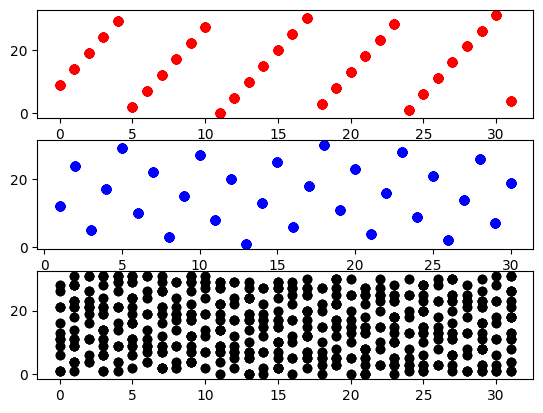

In [6]:
def generador_nuevo(a, c):
    """
    Generador de números pseudoaleatorios utilizando un generador lineal congruencial
    Pueden cambiar y x por cualquier semilla que se les ocurra
    """
    y = 1
    x = 1
    z = (y + x) % 32
    ys = [y]
    xs = [x]
    zs = [z]

    for i in range(1000):
        y = (5 * y + c) % 32
        x = (a * x) % 31
        z = (y + x) % 32
        ys.append(y)
        xs.append(x)
        zs.append(z)

    return ys, xs, zs

# Test generador_nuevo
ys, xs, zs = generador_nuevo(12, 9)

fig, ax = plt.subplots(3, 1)
ax[0].plot(ys[:-1], ys[1:], 'ro', label='y')
ax[1].plot(xs[:-1], xs[1:], 'bo', label='x')
ax[2].plot(zs[:-1], zs[1:], 'ko', label='z')
plt.show()

## c) Indicar en cuáles de los siguientes casos el generador
yi+1 = ayi + c mód (M)

In [11]:
''' Decide si n es primo '''
def esPrimo(n):
    for i in range(2, (n//2)+1):
        if n % i == 0:
            return False
    return True

''' Retorna los factores primos de n '''
def factoresPrimos(n):
    res = []
    for i in range(2, (n//2)+1):
        if (n%i == 0) and esPrimo(i):
            res.append(i)
    return(res)

''' Decide si el generador mixto y_i+1 = a*y_i + c mod M, Tiene perido M '''
def periodoMaximoMixto(a,c,M):
    factoresP = factoresPrimos(M)
    
    # El máximo comun divisor de c y M es 1
    if math.gcd(c,M) != 1: # MINIMO COMÚN DIVISOR
        return False
    
    # Por cada factor primo de M, a % p == 1
    for p in factoresP:
        if (a % p != 1):
            return False
        
    # si (M % 4 == 0) => (a % 4 == 1)
    if (M%4==0) and not (a%4==1):
        return False
    return True
    
print(f'El periodo I) tiene periodo Maximo?: {periodoMaximoMixto(a=125,c=3,M=2**9)}')
print(f'El periodo II) tiene periodo Maximo?: {periodoMaximoMixto(a=123,c=3,M=2**9)}')


El periodo I) tiene periodo Maximo: True
El periodo II) tiene periodo Maximo: False


In [31]:
# Una secuencia multiplicativa tiene periodo K sii:
# Si K = M - 1 entonces M es primo
# Si M es primo, entonces K divide a M - 1
# K = M - 1 sii a es raiz primitiva de M y M es primo

# Sea M natural, se dice que a es una raiz primitiva de M sii:
# a**((M-1)/p) % M != 1

def esRaizPrimitiva(a, M):
    fp = factoresPrimos(M-1)
    for p in fp:
        if (a**((M-1)//p) % M == 1):
            return False
    return True

def periodoMaximoMultiplicativo(a, M):
    if esPrimo(M) and esRaizPrimitiva(a, M):
        return True 
    return False

print(f'El periodo III) tiene periodo Maximo?: {periodoMaximoMultiplicativo(a=5,M=71)}')
print(f'El periodo IV) tiene periodo Maximo?: {periodoMaximoMultiplicativo(a=7,M=71)}')



El periodo III) tiene periodo Maximo?: False
El periodo IV) tiene periodo Maximo?: True


## d) Uilice el generador RANDU
$u_{i} = a \cdot u_{i−1} \mod (M)$, $a = 2^{16} + 3, M = 2^{31}$,

para generar puntos aleatorios en el cubo $[0, M) \times [0, M] \times [0, M)$, de la forma:  
$(u_{1}, u_{2}, u_{3}), (u_{4}, u_{5}, u_{6}), ...$  

y estimar el porcentaje de puntos que caen en la esfera centrada en $(M/2, M/2, M/2)$ de radio $M/10$.  

Repetir el procedimiento con el generador  
$y_{i} = a \cdot y_{i−1} \mod (M)$, $a = 7^{5}, M = 2^{31} - 1$,  
¿Cuál de los dos generadores estima mejor el valor real?

In [32]:
def generador_congruencial(a, M, seed, n):
    valores = []
    u = seed
    for _ in range(n):
        u = (a * u) % M
        valores.append(u)
    return valores

def puntos_en_esfera(puntos, M):
    centro = M / 2
    radio_cuadrado = (M / 10) ** 2
    dentro = 0
    for x, y, z in puntos:
        dist_cuadrada = (x - centro) ** 2 + (y - centro) ** 2 + (z - centro) ** 2
        if dist_cuadrada <= radio_cuadrado:
            dentro += 1
    return dentro / len(puntos)

def estimar_porcentaje_en_esfera(a, M, seed, n_puntos):
    total_numeros = n_puntos * 3
    numeros = generador_congruencial(a, M, seed, total_numeros)
    puntos = [tuple(numeros[i:i+3]) for i in range(0, total_numeros, 3)]
    porcentaje = puntos_en_esfera(puntos, M)
    return porcentaje * 100

# Parámetros
n_puntos = 10000
seed = 1

# RANDU
a_randu = 2**16 + 3
M_randu = 2**31
porcentaje_randu = estimar_porcentaje_en_esfera(a_randu, M_randu, seed, n_puntos)

# Segundo generador
a_alt = 7**5
M_alt = 2**31 - 1
porcentaje_alt = estimar_porcentaje_en_esfera(a_alt, M_alt, seed, n_puntos)

# Valor real (volumen relativo de una esfera dentro de un cubo)
volumen_esfera = (4/3) * np.pi * (1/10)**3
porcentaje_real = volumen_esfera * 100

print(f"RANDU estima: {porcentaje_randu:.2f}%")
print(f"Segundo generador estima: {porcentaje_alt:.2f}%")
print(f"Valor real: {porcentaje_real:.2f}%")

RANDU estima: 0.32%
Segundo generador estima: 0.43%
Valor real: 0.42%


# Ejercicio 2:

In [41]:
def simular_juego(n):
    
    # Genera un arreglo de tamaño n con numeros uniformemente distribuidos entre 0 y 1
    U = np.random.uniform(0, 1, n)
    
    # Inicializa el array de resultados a 0s
    resultados = np.zeros(n)

    # Caso U < 0.5 (sumar 2 números)
    mask_2 = U < 0.5
    W1 = np.random.uniform(0, 1, np.sum(mask_2)) # cuantos valores < 0.5
    W2 = np.random.uniform(0, 1, np.sum(mask_2))
    X2 = W1 + W2
    resultados[mask_2] = X2

    # Caso U >= 0.5 (sumar 3 números)
    mask_3 = ~mask_2
    W1 = np.random.uniform(0, 1, np.sum(mask_3)) 
    W2 = np.random.uniform(0, 1, np.sum(mask_3))
    W3 = np.random.uniform(0, 1, np.sum(mask_3))
    X3 = W1 + W2 + W3
    resultados[mask_3] = X3

    # Fracción de ganadas
    ganadores = resultados >= 1
    return np.mean(ganadores)

# Valores de n a simular
valores_n = [100, 1000, 10000, 100000, 1000000]

# Mostrar resultados en tabla
print(f"{'n':>10} | {'P(gana)':>10}")
print("-" * 23)
for n in valores_n:
    prob = simular_juego(n)
    print(f"{n:>10} | {prob:>10.4f}")


         n |    P(gana)
-----------------------
       100 |     0.6700
      1000 |     0.6740
     10000 |     0.6605
    100000 |     0.6659
   1000000 |     0.6665


# Ejercicio 3

In [44]:
'''
Las máquinas tragamonedas usualmente generan un premio cuando hay un acierto. Suponga mos que se genera el acierto con el siguiente esquema: se genera un número aleatorio, y
i) si es menor a un tercio, se suman dos nuevos números aleatorios
ii) si es mayor o igual a un tercio, se suman tres números aleatorios.

Si el resultado de la suma es menor o igual a 2, se genera un acierto.
'''

def tragamonedas(n):
    U = np.random.uniform(0, 1, n)  #[U1, U2, U3, ..., Un]
    resultados = np.zeros(n)        #[0, 0, 0, ..., 0]
    
    # Caso U < 1/3 (sumar 2 números)
    mask_2 = U < 1/3                #[todos los valores menores a 1/3]
    W1 = np.random.uniform(0, 1, np.sum(mask_2)) # cuantos valores < 1/3
    W2 = np.random.uniform(0, 1, np.sum(mask_2))
    X2 = W1 + W2
    resultados[mask_2] = X2
    
    # Caso U >= 1/3 (sumar 3 números)
    mask_3 = ~mask_2
    W1 = np.random.uniform(0, 1, np.sum(mask_3))
    W2 = np.random.uniform(0, 1, np.sum(mask_3))
    W3 = np.random.uniform(0, 1, np.sum(mask_3))
    X3 = W1 + W2 + W3
    resultados[mask_3] = X3
    
    ganadores = resultados <= 2
    return np.mean(ganadores)

valores_n = [100, 1000, 10000, 100000, 1000000]

# Mostrar resultados en tabla
print(f"{'n':>10} | {'P(gana)':>10}")
print("-" * 23)
for n in valores_n:
    prob = tragamonedas(n)
    print(f"{n:>10} | {prob:>10.4f}")
    
    
    

         n |    P(gana)
-----------------------
       100 |     0.8800
      1000 |     0.8870
     10000 |     0.8923
    100000 |     0.8872
   1000000 |     0.8882


## Ejercicio 4

In [45]:
np.random.seed(42)
N = 1000

# Probabilidades y medias
prob_cajas = [0.40, 0.32, 0.28]
medias = [3, 4, 5]

# Inicialización de contadores
menos_de_4 = 0
mas_de_4_conteo = [0, 0, 0]
mas_de_4_total = 0

for _ in range(N):
    caja = np.random.choice([0, 1, 2], p=prob_cajas)
    tiempo_espera = np.random.exponential(scale=medias[caja])
    
    if tiempo_espera < 4:
        menos_de_4 += 1
    else:
        mas_de_4_conteo[caja] += 1
        mas_de_4_total += 1

# Resultados
p_menos_4 = menos_de_4 / N
p_caja_dado_mas_4 = [conteo / mas_de_4_total for conteo in mas_de_4_conteo]

print(f"Probabilidad simulada de esperar menos de 4 min: {p_menos_4:.4f}")
print(f"Probabilidades simuladas condicionales dado espera > 4 min:")
print(f"  Caja 1: {p_caja_dado_mas_4[0]:.4f}")
print(f"  Caja 2: {p_caja_dado_mas_4[1]:.4f}")
print(f"  Caja 3: {p_caja_dado_mas_4[2]:.4f}")


Probabilidad simulada de esperar menos de 4 min: 0.6440
Probabilidades simuladas condicionales dado espera > 4 min:
  Caja 1: 0.3371
  Caja 2: 0.3118
  Caja 3: 0.3511


## Ejercicio 5  
Calcule exactamente el valor de las siguientes integrales. Mediante una simulación de Monte Carlo con n = 1000, 5000, 10000 iteraciones, calcule a su vez un valor aproximado y compare con el valor exacto.

- a)
$\int_{0}^1 (1-x^2)^{3/2}\,dx$

In [75]:
# La integral entre 0 y 1 de (1-x^2)^(3/2) dx = 3pi/16 

def g1(u):
    return (1-u**2)**(3/2)

valorReal = (3*math.pi)/16

print(f"Valor real de la integral: {valorReal}")

def monteCarlo_0_a_1(g, Nsim):
    integral = 0
    for _ in range(Nsim):
        integral += g(random())
    return integral / Nsim

for n in [1000, 5000, 10000]:
    print(f"Integral Monte Carlo en {n} iteraciones: {monteCarlo_0_a_1(g1, n)}")

Valor real de la integral: 0.5890486225480862
Integral Monte Carlo en 1000 iteraciones: 0.5881512052569992
Integral Monte Carlo en 5000 iteraciones: 0.5877532963500385
Integral Monte Carlo en 10000 iteraciones: 0.5877628604215355


- b) $\int_{2}^3 \frac{x}{x^2-1}\,dx$  

nos queda haciendo cambio de variables para aplicar montecarlo: $g(u) = \frac{y+2}{y^2+4y+3}$



In [76]:
# la integral entre 0 y 1 de (y+2)/(y**2+4y+3) = (ln(8) - ln(3)) / 2

def g2(u):
    return u / (u**2 - 1)

def valorReal2():
    return (math.log(8) - math.log(3)) / 2

print(f"Valor real de la integral: {valorReal2()}")

def monteCarlo_2_a_3(g, Nsim):
    integral = 0
    for _ in range(Nsim):
        integral += g(2 + random())
        
    return integral / Nsim

for n in [1000, 5000, 10000]:
    print(f"Integral Monte Carlo en {n} iteraciones: {monteCarlo_2_a_3(g2, n)}")

Valor real de la integral: 0.490414626505863
Integral Monte Carlo en 1000 iteraciones: 0.48497503206400117
Integral Monte Carlo en 5000 iteraciones: 0.48903624369457377
Integral Monte Carlo en 10000 iteraciones: 0.49074880276122684


- c) $\int_{0}^{\infty} x(1+x^2)^{-2}\,dx$  

nos queda haciendo cambio de variables para aplicar montecarlo: $h(y) = \frac{\frac{1}{y}-2}{1-2y+2y^2}$

In [83]:
# La integral entre 0 y 1 de ((1/y)-2)/(1-2y+2y**2)

def g3(x):
    return (x * ((1+x**2)**(-2)))

def monteCarlo_0_a_inf(g, Nsim):
    integral = 0
    for _ in range(Nsim):
        u = random()
        integral += g(g3((1/u)-1) * (1/u**2))
        
    return integral / Nsim

for n in [1000, 5000, 10000000]:
    print(f"Integral Monte Carlo en {n} iteraciones: {monteCarlo_0_a_inf(g3, n)}")

Integral Monte Carlo en 1000 iteraciones: 0.23083991593214034
Integral Monte Carlo en 5000 iteraciones: 0.22803472088124208
Integral Monte Carlo en 10000000 iteraciones: 0.22784972011997096
